In [1]:
import os
import glob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
! ls csv | head

DCF_CW_1_cwUsed.csv
DCF_CW_1_DataErrorRate.csv
DCF_CW_1_HeaderErrorRate.csv
DCF_CW_1_udpPacketTransmissionInfo.csv
DCF_CW_2_cwUsed.csv
DCF_CW_2_DataErrorRate.csv
DCF_CW_2_HeaderErrorRate.csv
DCF_CW_2_udpPacketTransmissionInfo.csv
DCF_CW_3_cwUsed.csv
DCF_CW_3_DataErrorRate.csv
ls: write error: Broken pipe


In [3]:
! ls sca/ | head 

DCF_CW_1.sca
DCF_CW_2.sca
DCF_CW_3.sca
DCF_CW_4.sca
DCF_LOAD_1.sca
DCF_LOAD_2.sca
DCF_LOAD_3.sca
DCF_LOAD_4.sca
DCF_RETRY_1.sca
DCF_RETRY_2.sca


In [4]:
! head csv/Step-1_Host-02_*.csv

==> csv/Step-1_Host-02_cwUsed.csv <==
Simulation Time,Node,Contetion Size
0.027133625047,accessPoint,31
0.127133625047,accessPoint,31
0.219154145732,wirelessHost[1],15
0.219192956279,accessPoint,31
0.227133625047,accessPoint,31
0.327133625047,accessPoint,31
0.385820769216,wirelessHost[0],15
0.38585960622,accessPoint,31
0.427133625047,accessPoint,31

==> csv/Step-1_Host-02_DataErrorRate.csv <==
Simulation Time,Node,Data Length,Error rate,SNIR
0.027180435594,wirelessHost[1],464,0,3313.6
0.027180435594,wirelessHost[1],464,0,3313.6
0.027180462051,wirelessHost[0],464,0,3107.43
0.027180462051,wirelessHost[0],464,0,3107.43
0.127180435594,wirelessHost[1],464,0,3313.6
0.127180435594,wirelessHost[1],464,0,3313.6
0.127180462051,wirelessHost[0],464,0,3107.43
0.127180462051,wirelessHost[0],464,0,3107.43
0.219192956279,accessPoint,272,0,3313.6

==> csv/Step-1_Host-02_HeaderErrorRate.csv <==
Simulation Time,Node,Header Length,Error rate,SNIR 
0.027180435594,wirelessHost[1],40,0,3313.6
0.027180435594,

### .sca handling

Rename sca files, remove `#` for easy file loading

In [5]:
# ! ls sca/

In [6]:
# rename all sca to load them in notebook without messy `#` issue
!sh -c 'ls sca/*-#0.sca 1>/dev/null 2>&1 && for f in sca/*-#0.sca; do mv "$f" "${f%-#0.sca}.sca"; done || echo "not found"'

not found


In [7]:
# check
! ls *-#0.sca
! ls sca | head

ls: cannot access '*-#0.sca': No such file or directory
DCF_CW_1.sca
DCF_CW_2.sca
DCF_CW_3.sca
DCF_CW_4.sca
DCF_LOAD_1.sca
DCF_LOAD_2.sca
DCF_LOAD_3.sca
DCF_LOAD_4.sca
DCF_RETRY_1.sca
DCF_RETRY_2.sca


In [8]:
# ! head -n 20 sca/Step-1_Host-02.sca

In [9]:
cw_fl ='csv/Step-1_Host-02_cwUsed.csv'
dataError_fl = 'csv/Step-1_Host-02_DataErrorRate.csv'
hdrError_fl = 'csv/Step-1_Host-02_HeaderErrorRate.csv'
udp_fl ='csv/Step-1_Host-02_udpPacketTransmissionInfo.csv'
sca_fl = 'sca/Step-1_Host-02.sca'

In [10]:
cw_df = pd.read_csv(cw_fl)
dataError_df = pd.read_csv(dataError_fl)
hdrError_df = pd.read_csv(hdrError_fl)
udp_df = pd.read_csv(udp_fl)

# Read scalar file
with open(sca_fl, 'r') as f:
    sca = f.read()

# Show the shape of each DataFrame as confirmation
print('cw_df:', cw_df.shape)
print('dataError_df:', dataError_df.shape)
print('hdrError_df:', hdrError_df.shape)
print('udp_df:', udp_df.shape)
# get sca lines
print('sca:', (len(sca.split('\n'))))

cw_df: (8242, 3)
dataError_df: (67638, 5)
hdrError_df: (67638, 5)
udp_df: (3998, 5)
sca: 3663


In [11]:
cw_df.head()

,Simulation Time,Node,Contetion Size
0,0.027134,accessPoint,31
1,0.127134,accessPoint,31
2,0.219154,wirelessHost[1],15
3,0.219193,accessPoint,31
4,0.227134,accessPoint,31


In [12]:
dataError_df.head()

,Simulation Time,Node,Data Length,Error rate,SNIR
0,0.02718,wirelessHost[1],464,0,3313.60
1,0.02718,wirelessHost[1],464,0,3313.60
2,0.02718,wirelessHost[0],464,0,3107.43
3,0.02718,wirelessHost[0],464,0,3107.43
4,0.12718,wirelessHost[1],464,0,3313.60


In [13]:
hdrError_df.head()

,Simulation Time,Node,Header Length,Error rate,SNIR
0,0.02718,wirelessHost[1],40,0.0,3313.60
1,0.02718,wirelessHost[1],40,0.0,3313.60
2,0.02718,wirelessHost[0],40,0.0,3107.43
3,0.02718,wirelessHost[0],40,0.0,3107.43
4,0.12718,wirelessHost[1],40,0.0,3313.60


In [14]:
udp_df.head()

,Simulation Time,Sender,Receiver,Packet ID,Delay
0,1.029298,10.0.0.1,10.0.0.4 (sinkNode),1114,1.009298
1,1.034461,10.0.0.1,10.0.0.4 (sinkNode),1179,0.994461
2,1.039505,10.0.0.1,10.0.0.4 (sinkNode),1244,0.979505
3,1.044488,10.0.0.1,10.0.0.4 (sinkNode),1311,0.964488
4,1.050285,10.0.0.1,10.0.0.4 (sinkNode),1406,0.950285


In [15]:
# 1 Packet Delivery Ratio (PDR) - CORRECTED WITH CSV EXTRACTION
# PDR = packets received by sink / total packets sent by all nodes

# Packets received by sink
num_packets_received = udp_df.shape[0]

# unique senders and their packet counts from CSV
# unique_senders = udp_df['Sender'].unique()
# num_hosts = len(unique_senders)


# total hosts from sca
wireless_match = re.search(r'param.*num_wireless\s+(\d+)', sca).group(1)
total_hosts = int(wireless_match)

# Extract packets per host from SCA file
packets_per_host = int(re.search(r'scalar WiredAndWirelessHostsWithAP\.wirelessHost\[0\]\.app\[0\] "packets sent" (\d+)', sca).group(1))
print(packets_per_host)

total_packets_sent = packets_per_host * total_hosts

# Calculate PDR
PDR = (num_packets_received / total_packets_sent) * 100

print(f"Packets received by sink: {num_packets_received}")
print(f"Number of unique senders in CSV: {total_hosts}")
print(f"Total packets sent: {total_packets_sent}")
print(f"PDR: {PDR}%")

2000
Packets received by sink: 3998
Number of unique senders in CSV: 2
Total packets sent: 4000
PDR: 99.95%


In [16]:
simulation_time = 40 # hard coded as fixed

In [17]:
# 2 Throughput (bps)
# Throughput = sum of sink node packet received bytes / simulation runtime

# Get actual bytes received at sink in udp layer from SCA file
sink_bytes_received = int(re.search(r'scalar WiredAndWirelessHostsWithAP\.sinkNode\.udp packetReceived:sum\(packetBytes\) (\d+)', sca).group(1))

# Calculate throughput in bps
throughput_bps = (sink_bytes_received * 8) / simulation_time

print(f"Sink bytes received (from SCA): {sink_bytes_received}")
print(f"Throughput: {throughput_bps} bps")

Sink bytes received (from SCA): 4125936
Throughput: 825187.2 bps


In [18]:
# 3 MAC-layer Retransmissions Rate
# we are using contention window increase to determine
cw_df = cw_df.sort_values(['Node', 'Simulation Time'])
retransmissions = 0
total_transmissions = 0
for node, group in cw_df.groupby('Node'):
    cw = group['Contetion Size'].to_numpy()
    retrans = (cw[1:] > cw[:-1]).sum()
    retransmissions += retrans
    total_transmissions += len(cw)
print(f"Estimated MAC-layer retransmissions (CW increases, all nodes): {retransmissions}")
if total_transmissions > 0:
    retrans_rate = retransmissions / total_transmissions
    print(f"Estimated MAC-layer retransmission rate (all nodes): {retrans_rate}%")
else:
    print("No transmissions found to estimate retransmission rate.")

Estimated MAC-layer retransmissions (CW increases, all nodes): 3820
Estimated MAC-layer retransmission rate (all nodes): 0.46347973792768743%


In [19]:
# 4 Bit Error Rate
# Calculate BER using weighted header and data error rates and lengths

h_len = hdrError_df['Header Length']
# print(h_len)
BER_h = hdrError_df['Error rate']
# print(BER_h)
d_len = dataError_df['Data Length']
BER_d = dataError_df['Error rate']
BER_packet = (BER_h * h_len + BER_d * d_len) / (h_len + d_len)
overall_ber = BER_packet.mean()

print(f"Weighted per-packet BER: {overall_ber:.6e}")

Weighted per-packet BER: 2.301551e-02


In [20]:
# 5 End-to-End Delay
# Use udpPacketTransmissionInfo.csv: 'Delay' column
if 'Delay' in udp_df.columns:
    delay_min = udp_df['Delay'].min()
    delay_max = udp_df['Delay'].max()
    delay_avg = udp_df['Delay'].mean()
    print(f"End-to-End Delay (min): {delay_min:.6f} s")
    print(f"End-to-End Delay (max): {delay_max:.6f} s")
    print(f"End-to-End Delay (avg): {delay_avg:.6f} s")
else:
    print("End-to-End Delay: 'Delay' column not found.")

End-to-End Delay (min): 0.004787 s
End-to-End Delay (max): 1.041241 s
End-to-End Delay (avg): 0.039658 s


### Functionalize

In [21]:
csv_root = 'csv'
sca_root = 'sca'

In [22]:
def get_metrics(cw_path, dataerr_path, headererr_path, udpinfo_path, scalar_path, runtime=40):

    # Load CSV files into DataFrames
    cw_df = pd.read_csv(cw_path)
    dataError_df = pd.read_csv(dataerr_path)
    hdrError_df = pd.read_csv(headererr_path)
    udp_df = pd.read_csv(udpinfo_path)

    # Read scalar file
    with open(scalar_path, 'r') as f:
        sca = f.read()

    # 1. Number of Devices
    wireless_match = re.search(r'param.*num_wireless\s+(\d+)', sca).group(1)
    total_hosts = int(wireless_match)

    # 2. Packet Delivery Ratio (PDR)
    num_packets_received = udp_df.shape[0]
    packets_per_host_pattern = r'scalar WiredAndWirelessHostsWithAP\.wirelessHost\[0\]\.app\[0\] "packets sent" (\d+)'
    packets_per_host = int(re.search(packets_per_host_pattern, sca).group(1))
    total_packets_sent = packets_per_host * total_hosts
    PDR = (num_packets_received / total_packets_sent) * 100

    # 3. Throughput (bps)
    sink_bytes_pattern = r'scalar WiredAndWirelessHostsWithAP\.sinkNode\.udp packetReceived:sum\(packetBytes\) (\d+)'
    sink_bytes_received = int(re.search(sink_bytes_pattern, sca).group(1))
    throughput_bps = (sink_bytes_received * 8) / runtime

    # 4. MAC-layer Retransmission Rate
    cw_df = cw_df.sort_values(['Node', 'Simulation Time'])
    retransmissions = 0
    total_transmissions = 0
    for node, group in cw_df.groupby('Node'):
        cw = group['Contetion Size'].to_numpy()
        retrans = (cw[1:] > cw[:-1]).sum()
        retransmissions += retrans
        total_transmissions += len(cw)
    retrans_rate = (retransmissions / total_transmissions) * 100 if total_transmissions > 0 else 0 # div by 0

    # 5. Bit Error Rate (BER)
    h_len = hdrError_df['Header Length']
    d_len = dataError_df['Data Length']
    BER_h = hdrError_df['Error rate']
    BER_d = dataError_df['Error rate']
    BER_packet = (BER_h * h_len + BER_d * d_len) / (h_len + d_len)
    overall_ber = BER_packet.mean()

    # 6. End-to-End Delay
    delay_min = udp_df['Delay'].min()
    delay_max = udp_df['Delay'].max()
    delay_avg = udp_df['Delay'].mean()

    # 7. Msg Length, Send Interval
    message_length_pattern = r'param \*\*\.\*Host\[\*\]\.app\[0\]\.messageLength\s+(\d+)([a-zA-Z]*)'
    send_interval_pattern = r'param \*\*\.\*Host\[\*\]\.app\[0\]\.sendInterval\s+([\d\.]+)([a-zA-Z]*)'

    message_length_match = re.search(message_length_pattern, sca)
    send_interval_match = re.search(send_interval_pattern, sca)

    message_length = f"{message_length_match.group(1)}{message_length_match.group(2)}" if message_length_match else "N/A"
    send_interval = f"{send_interval_match.group(1)}{send_interval_match.group(2)}" if send_interval_match else "N/A"

    # 8. DCF Parameters
    # CW Min
    cwmin_pattern = r'param \*\*\.\*Host\[\*\]\.wlan\[\*\]\.mac\.dcf\.channelAccess\.cwMin\s+(\d+)'
    cwmin_match = re.search(cwmin_pattern, sca)
    cw_min = cwmin_match.group(1) if cwmin_match else "N/A"

    # CW Max
    cwmax_pattern = r'param \*\*\.\*Host\[\*\]\.wlan\[\*\]\.mac\.dcf\.channelAccess\.cwMax\s+(\d+)'
    cwmax_match = re.search(cwmax_pattern, sca)
    cw_max = cwmax_match.group(1) if cwmax_match else "N/A"

    # Short Retry Limit
    retry_pattern = r'param \*\*\.\*Host\[\*\]\.wlan\[\*\]\.mac\.dcf\.recoveryProcedure\.shortRetryLimit\s+(\d+)'
    retry_match = re.search(retry_pattern, sca)
    retry_limit = retry_match.group(1) if retry_match else "N/A"

    # RTS Threshold
    rts_pattern = r'param \*\*\.\*Host\[\*\]\.wlan\[\*\]\.mac\.dcf\.rtsPolicy\.rtsThreshold\s+(\d+)([a-zA-Z]*)'
    rts_match = re.search(rts_pattern, sca)
    rts_threshold = f"{rts_match.group(1)}{rts_match.group(2)}" if rts_match else "N/A"

    # Return metrics rounded to 2 decimal places
    return {
        "Num Devices": total_hosts,
        "PDR (%)": round(PDR, 2),
        "Throughput (bps)": round(throughput_bps, 2),
        "MAC Retransmission Rate (%)": round(retrans_rate, 2),
        "BER (%)": round(overall_ber * 100, 2),
        "End-to-End Delay (Max)": round(delay_max, 6) if delay_max is not None else None,
        "End-to-End Delay (Min)": round(delay_min, 6) if delay_min is not None else None,
        "End-to-End Delay (Avg)": round(delay_avg, 6) if delay_avg is not None else None,
        "Message Length": message_length,
        "Send Interval": send_interval,
        "CW Min": cw_min,
        "CW Max": cw_max,
        "Retry Limit": retry_limit,
        "RTS Threshold": rts_threshold
    }

In [23]:
# Define start, end, and jump
start = 2
end = 20
jump = 2

# Initialize an empty list to store metrics
metrics_list = []

# Loop through the range and call the function for each host
for i in range(start, end + 1, jump):
    # Zero-pad the host number to two digits
    host_number = f"{i:02d}"
    
    cw_path = f'csv/Step-1_Host-{host_number}_cwUsed.csv'
    dataerr_path = f'csv/Step-1_Host-{host_number}_DataErrorRate.csv'
    headererr_path = f'csv/Step-1_Host-{host_number}_HeaderErrorRate.csv'
    udpinfo_path = f'csv/Step-1_Host-{host_number}_udpPacketTransmissionInfo.csv'
    scalar_path = f'sca/Step-1_Host-{host_number}.sca'

    # Check if all files exist
    if not all(os.path.exists(path) for path in [cw_path, dataerr_path, headererr_path, udpinfo_path, scalar_path]):
        print(f"Skipping Host-{host_number}: One or more files are missing.")
        continue

    # Call the function and append the results to the list
    metrics = get_metrics(cw_path, dataerr_path, headererr_path, udpinfo_path, scalar_path)
    metrics_list.append(metrics)

# Convert the list of metrics into a DataFrame573387.2	
metrics_df = pd.DataFrame(metrics_list)

# Display the DataFrame
metrics_df

,Num Devices,PDR (%),Throughput (bps),MAC Retransmission Rate (%),BER (%),End-to-End Delay (Max),End-to-End Delay (Min),End-to-End Delay (Avg),Message Length,Send Interval,CW Min,CW Max,Retry Limit,RTS Threshold
0,2,99.95,825187.2,46.35,2.30,1.041241,0.004787,0.039658,1024B,20ms,15,1023,N/A,N/A
1,4,94.84,1565956.8,20.61,0.97,3.298450,0.004720,1.190798,1024B,20ms,15,1023,N/A,N/A
2,6,63.52,1573387.2,27.49,1.53,6.887172,0.969538,2.888359,1024B,20ms,15,1023,N/A,N/A
3,8,47.59,1571736.0,31.78,1.84,7.796824,0.709108,3.857061,1024B,20ms,15,1023,N/A,N/A
4,10,38.02,1569259.2,34.96,2.20,9.833194,0.972089,4.752385,1024B,20ms,15,1023,N/A,N/A
5,12,31.60,1565544.0,37.30,2.35,13.058214,0.957355,5.630027,1024B,20ms,15,1023,N/A,N/A
6,14,27.06,1563686.4,39.41,2.51,15.022148,0.858248,6.500545,1024B,20ms,15,1023,N/A,N/A
7,16,23.61,1559145.6,41.48,2.53,16.720702,0.921869,7.323058,1024B,20ms,15,1023,N/A,N/A
8,18,20.94,1556256.0,42.73,2.72,23.858557,0.925816,8.095679,1024B,20ms,15,1023,N/A,N/A
9,20,18.83,1555017.6,43.93,2.88,23.325527,0.922517,8.876411,1024B,20ms,15,1023,N/A,N/A


In [24]:
def get_df(step_prefix, start, end, jump=1, file_format="{}", zero_pad=False):

    metrics_list = []
    
    for i in range(start, end + 1, jump):
        # Format the configuration identifier
        if zero_pad:
            cfg = file_format.format(f"{i:02d}")
        else:
            cfg = file_format.format(i)
        
        # Construct file paths
        cw_path = f'csv/{step_prefix}_{cfg}_cwUsed.csv'
        dataerr_path = f'csv/{step_prefix}_{cfg}_DataErrorRate.csv'
        headererr_path = f'csv/{step_prefix}_{cfg}_HeaderErrorRate.csv'
        udpinfo_path = f'csv/{step_prefix}_{cfg}_udpPacketTransmissionInfo.csv'
        scalar_path = f'sca/{step_prefix}_{cfg}.sca'
        
        # Check if all files exist
        file_paths = [cw_path, dataerr_path, headererr_path, udpinfo_path, scalar_path]
        if not all(os.path.exists(path) for path in file_paths):
            print(f"Skipping {step_prefix}_{cfg}: One or more files are missing.")
            continue
        
        # Call the function and append the results to the list
        try:
            metrics = get_metrics(cw_path, dataerr_path, headererr_path, udpinfo_path, scalar_path)
            metrics_list.append(metrics)
        except Exception as e:
            print(f"Error processing {step_prefix}_{cfg}: {e}")
            continue
    
    # Convert the list of metrics into a DataFrame
    return pd.DataFrame(metrics_list)

In [25]:
metrics1_df = get_df("Step-1", 2, 20, jump=2, file_format="Host-{}", zero_pad=True)
metrics1_df

,Num Devices,PDR (%),Throughput (bps),MAC Retransmission Rate (%),BER (%),End-to-End Delay (Max),End-to-End Delay (Min),End-to-End Delay (Avg),Message Length,Send Interval,CW Min,CW Max,Retry Limit,RTS Threshold
0,2,99.95,825187.2,46.35,2.30,1.041241,0.004787,0.039658,1024B,20ms,15,1023,N/A,N/A
1,4,94.84,1565956.8,20.61,0.97,3.298450,0.004720,1.190798,1024B,20ms,15,1023,N/A,N/A
2,6,63.52,1573387.2,27.49,1.53,6.887172,0.969538,2.888359,1024B,20ms,15,1023,N/A,N/A
3,8,47.59,1571736.0,31.78,1.84,7.796824,0.709108,3.857061,1024B,20ms,15,1023,N/A,N/A
4,10,38.02,1569259.2,34.96,2.20,9.833194,0.972089,4.752385,1024B,20ms,15,1023,N/A,N/A
5,12,31.60,1565544.0,37.30,2.35,13.058214,0.957355,5.630027,1024B,20ms,15,1023,N/A,N/A
6,14,27.06,1563686.4,39.41,2.51,15.022148,0.858248,6.500545,1024B,20ms,15,1023,N/A,N/A
7,16,23.61,1559145.6,41.48,2.53,16.720702,0.921869,7.323058,1024B,20ms,15,1023,N/A,N/A
8,18,20.94,1556256.0,42.73,2.72,23.858557,0.925816,8.095679,1024B,20ms,15,1023,N/A,N/A
9,20,18.83,1555017.6,43.93,2.88,23.325527,0.922517,8.876411,1024B,20ms,15,1023,N/A,N/A


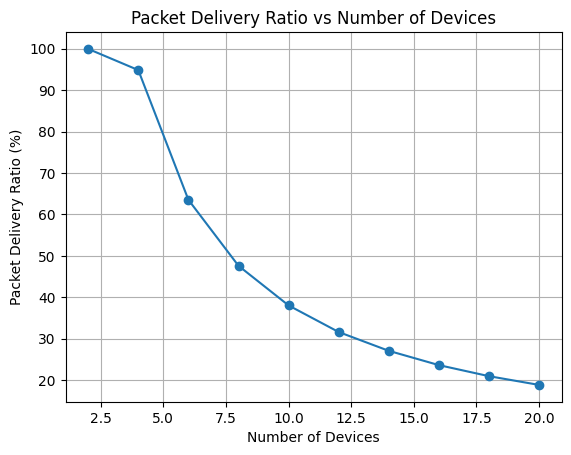

In [26]:
plt.plot(metrics_df['Num Devices'], metrics_df['PDR (%)'], marker='o')
plt.title('Packet Delivery Ratio vs Number of Devices')
plt.xlabel('Number of Devices')
plt.ylabel('Packet Delivery Ratio (%)')
plt.grid()
plt.show()

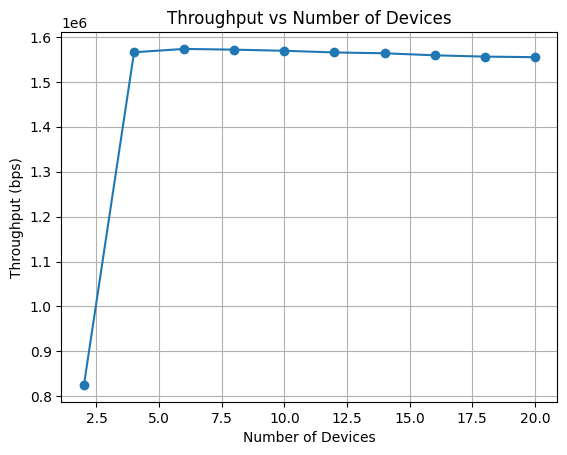

In [27]:
plt.plot(metrics_df['Num Devices'], metrics_df['Throughput (bps)'], marker='o')
plt.title('Throughput vs Number of Devices')
plt.xlabel('Number of Devices')
plt.ylabel('Throughput (bps)')
plt.grid()
plt.show()

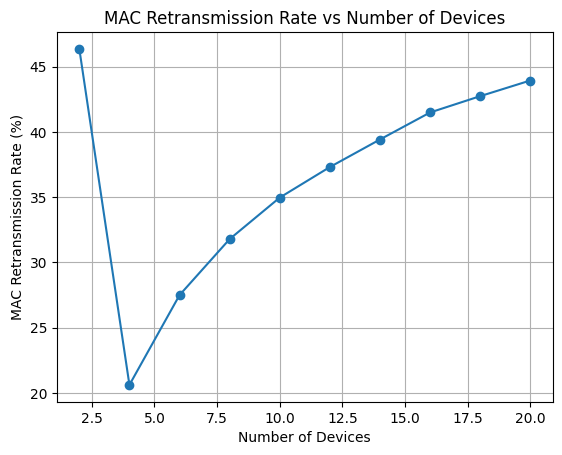

In [28]:
plt.plot(metrics_df['Num Devices'], metrics_df['MAC Retransmission Rate (%)'], marker='o')
plt.title('MAC Retransmission Rate vs Number of Devices')
plt.xlabel('Number of Devices')
plt.ylabel('MAC Retransmission Rate (%)')
plt.grid()
plt.show()

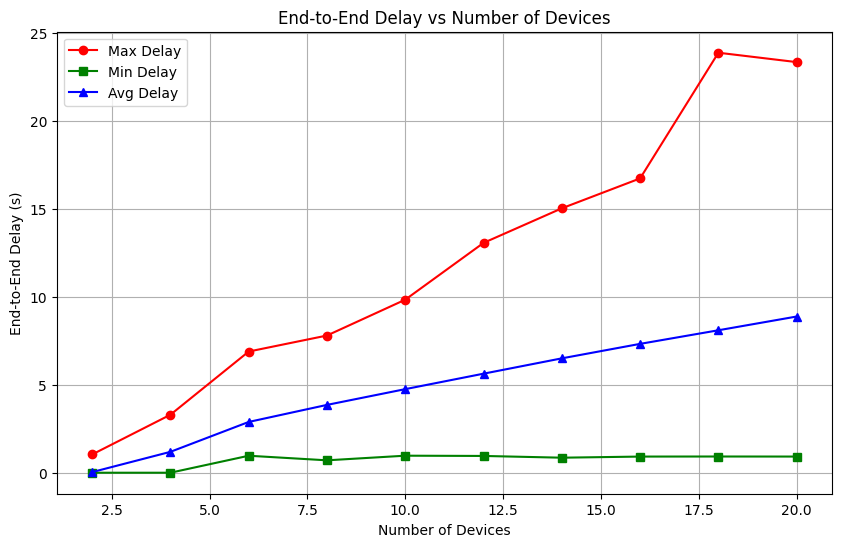

In [29]:
# Plot all end-to-end delay metrics
plt.figure(figsize=(10, 6))
plt.plot(metrics_df['Num Devices'], metrics_df['End-to-End Delay (Max)'], marker='o', color='r', label='Max Delay')
plt.plot(metrics_df['Num Devices'], metrics_df['End-to-End Delay (Min)'], marker='s', color='g', label='Min Delay')
plt.plot(metrics_df['Num Devices'], metrics_df['End-to-End Delay (Avg)'], marker='^', color='b', label='Avg Delay')
plt.title('End-to-End Delay vs Number of Devices')
plt.xlabel('Number of Devices')
plt.ylabel('End-to-End Delay (s)')
plt.grid()
plt.legend()
plt.show()

In [30]:
metrics_df.to_csv("output/output-1.csv", index=False)

In [31]:
# 7. Extract additional information from scalar file
# Corrected regex patterns for the parameters
message_length_pattern = r'param \*\*\.\*Host\[\*\]\.app\[\*\]\.messageLength\s+(\d+)([a-zA-Z]*)'
send_interval_pattern = r'param \*\*\.\*Host\[\*\]\.app\[\*\]\.sendInterval\s+([\d\.]+)([a-zA-Z]*)'

# Extract values using regex
message_length_match = re.search(message_length_pattern, sca)
send_interval_match = re.search(send_interval_pattern, sca)

# Extract and format the results
message_length = f"{message_length_match.group(1)}{message_length_match.group(2)}" if message_length_match else None
send_interval = f"{send_interval_match.group(1)}{send_interval_match.group(2)}" if send_interval_match else None

print("Message Length:", message_length)
print("Send Interval:", send_interval)

Message Length: 100B
Send Interval: 1s


In [32]:
scalar_path_2 = f'sca/Step-2a_1.sca'

with open(scalar_path_2, 'r') as f:
    sca_2 = f.read()

total_hosts = int(re.search(r'param.*num_wireless\s+(\d+)', sca_2).group(1))
print(int(total_hosts))

10


In [33]:
udp2_df = pd.read_csv("csv/Step-2a_1_udpPacketTransmissionInfo.csv")
num_packets_received = udp2_df.shape[0]

wireless_match = re.search(r'param.*num_wireless\s+(\d+)', sca_2).group(1)
total_hosts = int(wireless_match)

# Extract packets per host from SCA file
packets_per_host = int(re.search(r'scalar WiredAndWirelessHostsWithAP\.wirelessHost\[0\]\.app\[0\] "packets sent" (\d+)', sca).group(1))
print(packets_per_host)

total_packets_sent = packets_per_host * total_hosts

# Calculate PDR
PDR = (num_packets_received / total_packets_sent) * 100

print(f"Packets received by sink: {num_packets_received}")
print(f"Number of unique senders in CSV: {total_hosts}")
print(f"Total packets sent: {total_packets_sent}")
print(f"PDR: {PDR}%")

2000
Packets received by sink: 7990
Number of unique senders in CSV: 10
Total packets sent: 20000
PDR: 39.95%


In [34]:
metrics_2a_df = get_df("Step-2a", 1, 10)
metrics_2a_df

,Num Devices,PDR (%),Throughput (bps),MAC Retransmission Rate (%),BER (%),End-to-End Delay (Max),End-to-End Delay (Min),End-to-End Delay (Avg),Message Length,Send Interval,CW Min,CW Max,Retry Limit,RTS Threshold
0,10,99.88,811784.0,52.81,3.76,1.506474,0.002625,0.062723,500B,50ms,15,1023,N/A,N/A
1,10,99.86,971462.4,52.30,4.10,2.031471,0.002938,0.086959,600B,50ms,15,1023,N/A,N/A
2,10,99.88,1131384.0,48.60,4.73,2.868678,0.003309,0.175259,700B,50ms,15,1023,N/A,N/A
3,10,97.44,1259672.0,33.13,6.42,4.442407,0.003717,0.437138,800B,50ms,15,1023,N/A,N/A
4,10,87.83,1275921.6,34.17,6.87,10.189989,0.004125,2.479265,900B,50ms,15,1023,N/A,N/A
5,10,96.80,1561190.4,34.01,2.10,5.883303,0.004621,1.046785,1000B,50ms,15,1023,N/A,N/A
6,10,83.45,1612921.6,34.50,2.20,11.698138,0.005437,2.872382,1200B,50ms,15,1023,N/A,N/A
7,10,83.45,1612921.6,34.50,2.20,11.698138,0.005437,2.872382,1200B,50ms,15,1023,N/A,N/A
8,10,78.08,1633953.6,34.66,2.20,12.639511,0.147956,3.909585,1300B,50ms,15,1023,N/A,N/A
9,10,73.40,1653555.2,34.55,2.19,11.906622,0.621183,4.468380,1400B,50ms,15,1023,N/A,N/A


In [35]:
metrics_2a_df

,Num Devices,PDR (%),Throughput (bps),MAC Retransmission Rate (%),BER (%),End-to-End Delay (Max),End-to-End Delay (Min),End-to-End Delay (Avg),Message Length,Send Interval,CW Min,CW Max,Retry Limit,RTS Threshold
0,10,99.88,811784.0,52.81,3.76,1.506474,0.002625,0.062723,500B,50ms,15,1023,N/A,N/A
1,10,99.86,971462.4,52.30,4.10,2.031471,0.002938,0.086959,600B,50ms,15,1023,N/A,N/A
2,10,99.88,1131384.0,48.60,4.73,2.868678,0.003309,0.175259,700B,50ms,15,1023,N/A,N/A
3,10,97.44,1259672.0,33.13,6.42,4.442407,0.003717,0.437138,800B,50ms,15,1023,N/A,N/A
4,10,87.83,1275921.6,34.17,6.87,10.189989,0.004125,2.479265,900B,50ms,15,1023,N/A,N/A
5,10,96.80,1561190.4,34.01,2.10,5.883303,0.004621,1.046785,1000B,50ms,15,1023,N/A,N/A
6,10,83.45,1612921.6,34.50,2.20,11.698138,0.005437,2.872382,1200B,50ms,15,1023,N/A,N/A
7,10,83.45,1612921.6,34.50,2.20,11.698138,0.005437,2.872382,1200B,50ms,15,1023,N/A,N/A
8,10,78.08,1633953.6,34.66,2.20,12.639511,0.147956,3.909585,1300B,50ms,15,1023,N/A,N/A
9,10,73.40,1653555.2,34.55,2.19,11.906622,0.621183,4.468380,1400B,50ms,15,1023,N/A,N/A


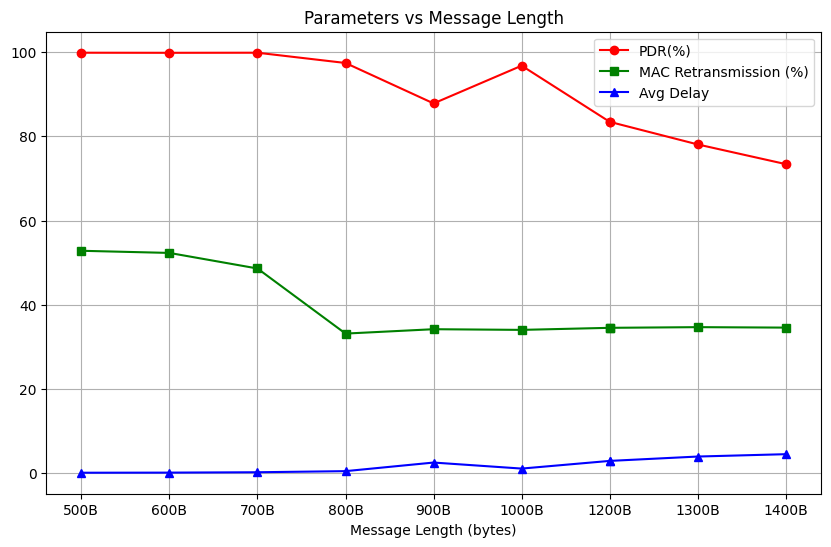

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(metrics_2a_df['Message Length'], metrics_2a_df['PDR (%)'], marker='o', color='r', label='PDR(%)')
plt.plot(metrics_2a_df['Message Length'], metrics_2a_df['MAC Retransmission Rate (%)'], marker='s', color='g', label='MAC Retransmission (%)')
plt.plot(metrics_2a_df['Message Length'], metrics_2a_df['End-to-End Delay (Avg)'], marker='^', color='b', label='Avg Delay')
plt.title('Parameters vs Message Length')
plt.xlabel('Message Length (bytes)')
plt.grid()
plt.legend()
plt.show()

In [37]:
metrics_2b_df = get_df("Step-2b", 1, 10)
metrics_2b_df

,Num Devices,PDR (%),Throughput (bps),MAC Retransmission Rate (%),BER (%),End-to-End Delay (Max),End-to-End Delay (Min),End-to-End Delay (Avg),Message Length,Send Interval,CW Min,CW Max,Retry Limit,RTS Threshold
0,4,99.88,659654.4,48.16,0.97,1.052202,0.005619,0.039844,1024B,50ms,15,1023,N/A,N/A
1,4,100.00,733132.8,48.27,0.96,1.156369,0.004720,0.041277,1024B,45ms,15,1023,N/A,N/A
2,4,99.90,824774.4,48.64,0.99,1.121793,0.009644,0.044095,1024B,40ms,15,1023,N/A,N/A
3,4,100.00,942835.2,48.40,0.94,1.281700,0.004889,0.048667,1024B,35ms,15,1023,N/A,N/A
4,4,99.94,1099905.6,46.79,0.94,1.346300,0.004991,0.057146,1024B,30ms,15,1023,N/A,N/A
5,4,99.94,1320134.4,33.48,0.87,1.231972,0.004720,0.090242,1024B,25ms,15,1023,N/A,N/A
6,4,94.84,1565956.8,20.61,0.97,3.298450,0.004720,1.190798,1024B,20ms,15,1023,N/A,N/A
7,4,71.31,1569672.0,20.76,0.99,3.589163,0.967745,1.988202,1024B,15ms,15,1023,N/A,N/A
8,4,47.47,1567608.0,21.42,1.02,3.733418,0.997811,2.040962,1024B,10ms,15,1023,N/A,N/A
9,4,23.75,1568846.4,21.45,1.06,3.711710,1.009695,2.058048,1024B,5ms,15,1023,N/A,N/A


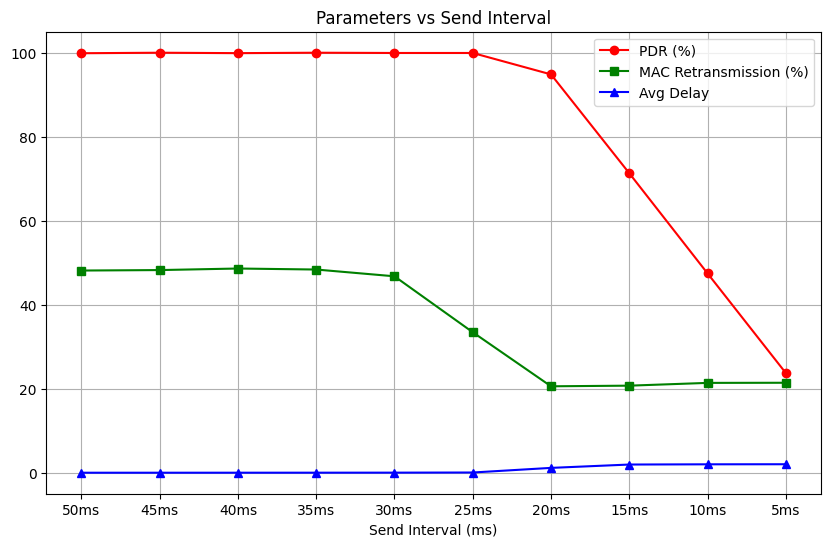

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(metrics_2b_df['Send Interval'], metrics_2b_df['PDR (%)'], marker='o', color='r', label='PDR (%)')
plt.plot(metrics_2b_df['Send Interval'], metrics_2b_df['MAC Retransmission Rate (%)'], marker='s', color='g', label='MAC Retransmission (%)')
plt.plot(metrics_2b_df['Send Interval'], metrics_2b_df['End-to-End Delay (Avg)'], marker='^', color='b', label='Avg Delay')
plt.title('Parameters vs Send Interval')
plt.xlabel('Send Interval (ms)')
plt.grid()
plt.legend()
plt.show()

In [39]:
metrics_2c_df = get_df("Step-2c", 1, 5)
metrics_2c_df

,Num Devices,PDR (%),Throughput (bps),MAC Retransmission Rate (%),BER (%),End-to-End Delay (Max),End-to-End Delay (Min),End-to-End Delay (Avg),Message Length,Send Interval,CW Min,CW Max,Retry Limit,RTS Threshold
0,8,99.88,664768.0,52.09,3.12,1.288135,0.003599,0.046941,512B,50ms,15,1023,N/A,N/A
1,8,99.89,1240203.2,39.22,4.54,3.895634,0.003586,0.291533,768B,40ms,15,1023,N/A,N/A
2,8,71.43,1572148.8,31.91,1.88,7.398040,0.715440,3.525204,1024B,30ms,15,1023,N/A,N/A
3,8,39.66,1634472.0,31.71,1.88,11.948392,0.758567,4.574558,1280B,20ms,15,1023,N/A,N/A
4,8,18.37,1655244.8,31.20,1.87,14.695922,0.992649,5.024630,1400B,10ms,15,1023,N/A,N/A


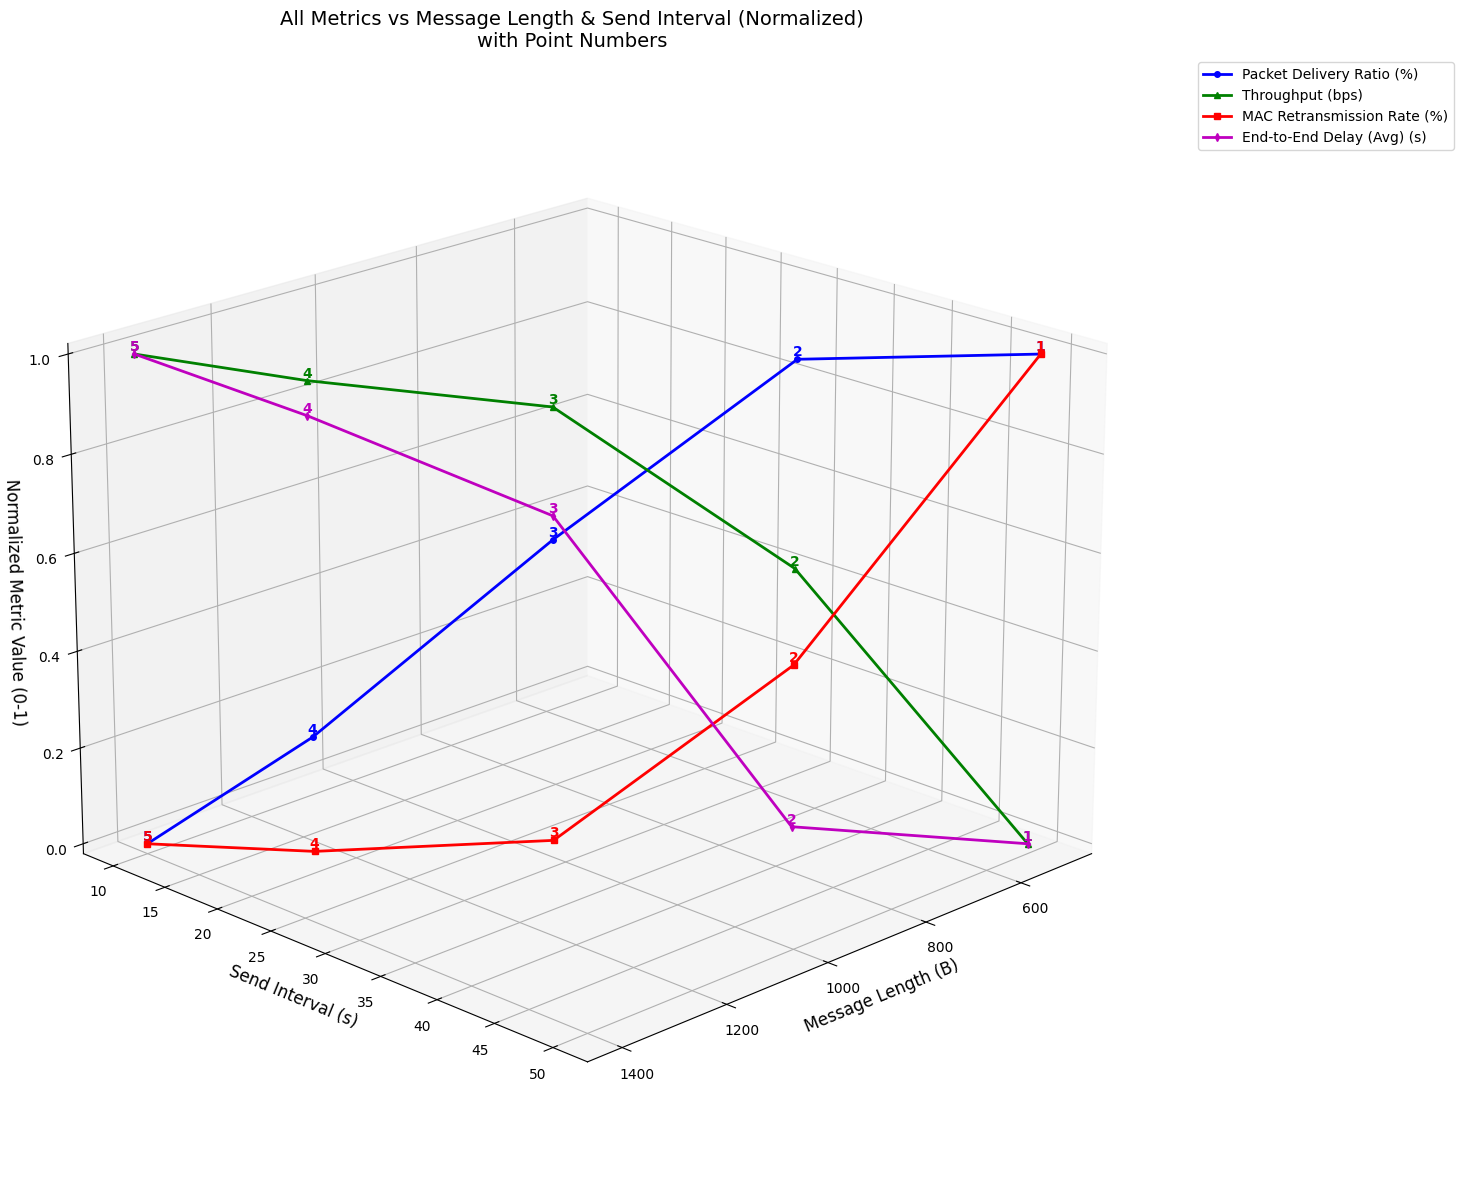

In [40]:
from mpl_toolkits.mplot3d import Axes3D

def to_numeric(val):
    # Converts values like '1024B' or '1s' to float (removes units)
    if isinstance(val, str):
        return float(re.findall(r"[\d.]+", val)[0])
    return val

def normalize_column(col):
    return (col - col.min()) / (col.max() - col.min())

fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')

metrics = [
    ("PDR (%)", "Packet Delivery Ratio (%)"),
    ("Throughput (bps)", "Throughput (bps)"),
    ("MAC Retransmission Rate (%)", "MAC Retransmission Rate (%)"),
    ("End-to-End Delay (Avg)", "End-to-End Delay (Avg) (s)")
]

colors = ['b', 'g', 'r', 'm']
markers = ['o', '^', 's', 'd']

x = metrics_2c_df["Message Length"].apply(to_numeric)
y = metrics_2c_df["Send Interval"].apply(to_numeric)

for i, ((metric_col, metric_label), color, marker) in enumerate(zip(metrics, colors, markers)):
    z = normalize_column(metrics_2c_df[metric_col])
    sort_idx = np.lexsort((y, x))
    
    # Plot the line
    ax.plot(x.iloc[sort_idx], y.iloc[sort_idx], z.iloc[sort_idx], 
            marker=marker, color=color, label=metric_label, linewidth=2, markersize=4)
    
    # Add numbered annotations for each point
    for j, idx in enumerate(sort_idx):
        ax.text(x.iloc[idx], y.iloc[idx], z.iloc[idx], 
                f'{j+1}', color=color, fontsize=10, fontweight='bold',
                ha='center', va='bottom')

ax.set_xlabel("Message Length (B)", fontsize=12)
ax.set_ylabel("Send Interval (s)", fontsize=12)
ax.set_zlabel("Normalized Metric Value (0-1)", fontsize=12)
ax.set_title("All Metrics vs Message Length & Send Interval (Normalized)\nwith Point Numbers", fontsize=14)

# Set optimal viewing angle for better understanding
ax.view_init(elev=20, azim=45)

# Improve legend positioning
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [41]:
# DCF LOAD configs
dcf_load_df = get_df("DCF_LOAD", 1, 4, file_format="{}")

# DCF CW configs
dcf_cw_df = get_df("DCF_CW", 1, 4, file_format="{}")

# DCF RETRY configs
dcf_retry_df = get_df("DCF_RETRY", 1, 4, file_format="{}")

# DCF RTS configs
dcf_rts_df = get_df("DCF_RTS", 1, 4, file_format="{}")

In [42]:
dcf_load_df

,Num Devices,PDR (%),Throughput (bps),MAC Retransmission Rate (%),BER (%),End-to-End Delay (Max),End-to-End Delay (Min),End-to-End Delay (Avg),Message Length,Send Interval,CW Min,CW Max,Retry Limit,RTS Threshold
0,4,99.88,659654.4,48.47,2.62,1.134777,0.009483,0.041360,1024B,50ms,15,1023,7,2346B
1,4,99.94,1099905.6,45.22,2.53,1.418087,0.004631,0.068633,1024B,30ms,15,1023,7,2346B
2,4,86.55,1429113.6,21.75,3.22,3.916723,0.274524,1.856992,1024B,20ms,15,1023,7,2346B
3,4,43.38,1432416.0,21.50,3.19,3.914443,0.997452,2.236111,1024B,10ms,15,1023,7,2346B


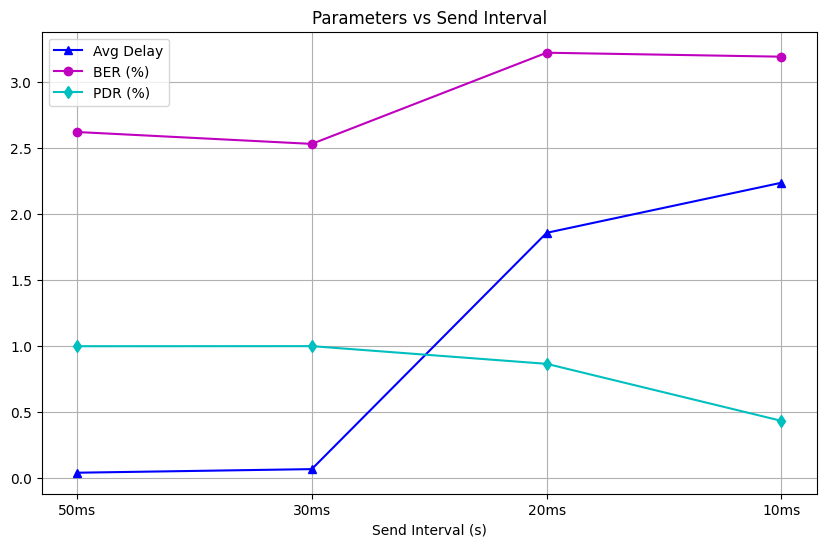

In [43]:
# Plot all end-to-end delay metrics
plt.figure(figsize=(10, 6))
plt.plot(dcf_load_df['Send Interval'], dcf_load_df['End-to-End Delay (Avg)'], marker='^', color='b', label='Avg Delay')
plt.plot(dcf_load_df['Send Interval'], dcf_load_df['BER (%)'], marker='o', color='m', label='BER (%)')
plt.plot(dcf_load_df['Send Interval'], dcf_load_df['PDR (%)']/100, marker='d', color='c', label='PDR (%)')


plt.title('Parameters vs Send Interval')
plt.xlabel('Send Interval (s)')
# plt.ylabel('End-to-End Delay (s)')
plt.grid()
plt.legend()
plt.show()

In [44]:
dcf_cw_df

,Num Devices,PDR (%),Throughput (bps),MAC Retransmission Rate (%),BER (%),End-to-End Delay (Max),End-to-End Delay (Min),End-to-End Delay (Avg),Message Length,Send Interval,CW Min,CW Max,Retry Limit,RTS Threshold
0,4,78.97,1304035.2,29.69,5.49,3.538821,0.718892,2.168656,1024B,20ms,7,31,7,2346B
1,4,86.09,1421476.8,22.11,3.34,3.149411,0.665242,1.969187,1024B,20ms,15,127,7,2346B
2,4,90.56,1495368.0,13.96,1.96,2.636917,0.816814,1.832660,1024B,20ms,31,255,7,2346B
3,4,92.34,1524676.8,8.21,1.10,2.686806,0.836916,1.694972,1024B,20ms,63,1023,7,2346B


In [45]:
dcf_retry_df

,Num Devices,PDR (%),Throughput (bps),MAC Retransmission Rate (%),BER (%),End-to-End Delay (Max),End-to-End Delay (Min),End-to-End Delay (Avg),Message Length,Send Interval,CW Min,CW Max,Retry Limit,RTS Threshold
0,4,85.12,1405584.0,19.94,3.69,2.759266,0.902918,1.849790,1024B,20ms,15,1023,2,2346B
1,4,86.17,1422921.6,22.18,3.34,2.975493,0.762272,2.032767,1024B,20ms,15,1023,4,2346B
2,4,86.55,1429113.6,21.75,3.22,3.916723,0.274524,1.856992,1024B,20ms,15,1023,7,2346B
3,4,86.51,1428494.4,21.86,3.25,3.986030,0.274524,1.828231,1024B,20ms,15,1023,10,2346B


In [46]:
dcf_rts_df

,Num Devices,PDR (%),Throughput (bps),MAC Retransmission Rate (%),BER (%),End-to-End Delay (Max),End-to-End Delay (Min),End-to-End Delay (Avg),Message Length,Send Interval,CW Min,CW Max,Retry Limit,RTS Threshold
0,4,86.55,1429113.6,21.75,3.22,3.916723,0.274524,1.856992,1024B,20ms,15,1023,7,2346B
1,4,86.55,1429113.6,21.75,3.22,3.916723,0.274524,1.856992,1024B,20ms,15,1023,7,1400B
2,4,94.84,1565956.8,20.61,0.97,3.298450,0.004720,1.190798,1024B,20ms,15,1023,7,512B
3,4,94.84,1565956.8,21.01,0.79,2.944045,0.004721,1.087793,1024B,20ms,15,1023,7,0B


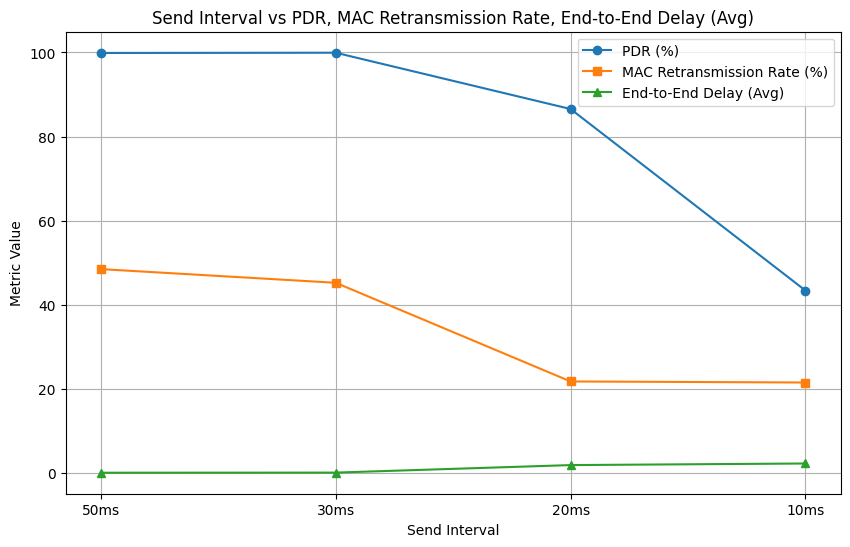

In [47]:
plt.figure(figsize=(10,6))
plt.plot(dcf_load_df['Send Interval'], dcf_load_df['PDR (%)'], marker='o', label='PDR (%)')
plt.plot(dcf_load_df['Send Interval'], dcf_load_df['MAC Retransmission Rate (%)'], marker='s', label='MAC Retransmission Rate (%)')
plt.plot(dcf_load_df['Send Interval'], dcf_load_df['End-to-End Delay (Avg)'], marker='^', label='End-to-End Delay (Avg)')
plt.xlabel('Send Interval')
plt.ylabel('Metric Value')
plt.title('Send Interval vs PDR, MAC Retransmission Rate, End-to-End Delay (Avg)')
plt.legend()
plt.grid()
plt.show()

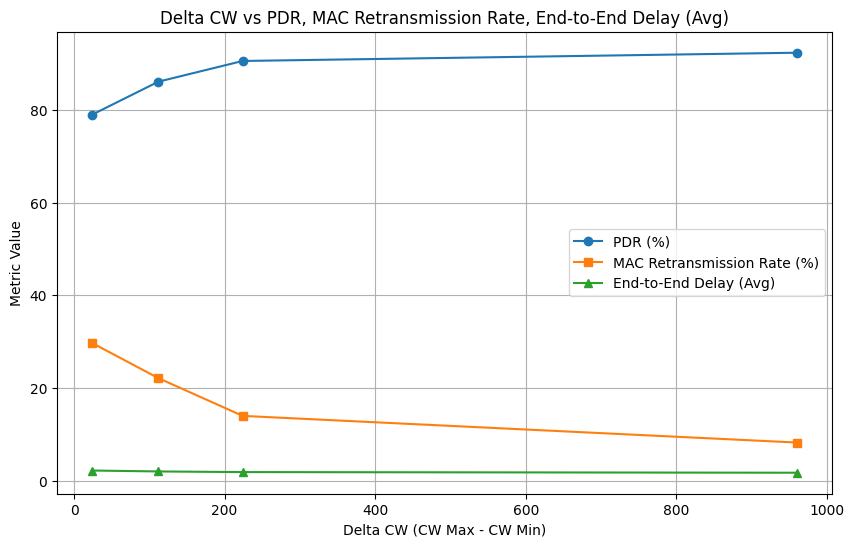

In [48]:
dcf_cw_df['Delta CW'] = dcf_cw_df['CW Max'].astype(float) - dcf_cw_df['CW Min'].astype(float)

plt.figure(figsize=(10,6))
plt.plot(dcf_cw_df['Delta CW'], dcf_cw_df['PDR (%)'], marker='o', label='PDR (%)')
plt.plot(dcf_cw_df['Delta CW'], dcf_cw_df['MAC Retransmission Rate (%)'], marker='s', label='MAC Retransmission Rate (%)')
plt.plot(dcf_cw_df['Delta CW'], dcf_cw_df['End-to-End Delay (Avg)'], marker='^', label='End-to-End Delay (Avg)')
plt.xlabel('Delta CW (CW Max - CW Min)')
plt.ylabel('Metric Value')
plt.title('Delta CW vs PDR, MAC Retransmission Rate, End-to-End Delay (Avg)')
plt.legend()
plt.grid()

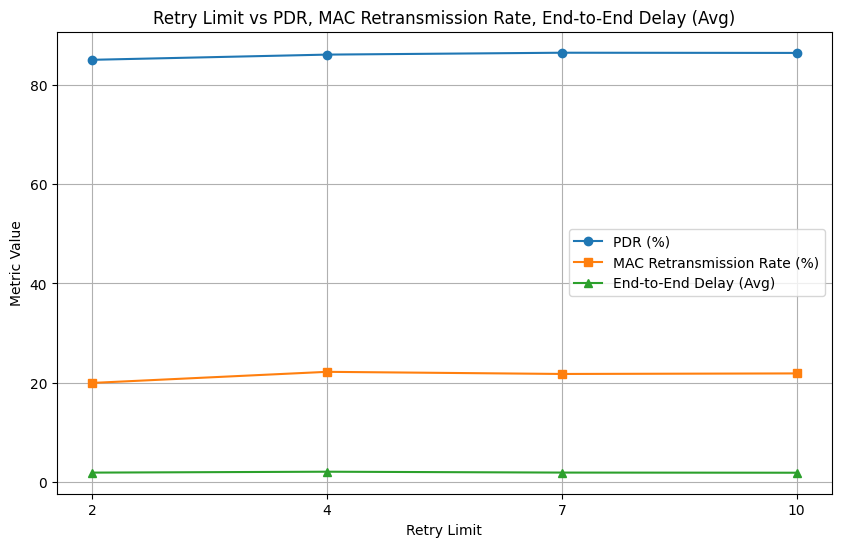

In [49]:
plt.figure(figsize=(10,6))
plt.plot(dcf_retry_df['Retry Limit'], dcf_retry_df['PDR (%)'], marker='o', label='PDR (%)')
plt.plot(dcf_retry_df['Retry Limit'], dcf_retry_df['MAC Retransmission Rate (%)'], marker='s', label='MAC Retransmission Rate (%)')
plt.plot(dcf_retry_df['Retry Limit'], dcf_retry_df['End-to-End Delay (Avg)'], marker='^', label='End-to-End Delay (Avg)')
plt.xlabel('Retry Limit')
plt.ylabel('Metric Value')
plt.title('Retry Limit vs PDR, MAC Retransmission Rate, End-to-End Delay (Avg)')
plt.legend()
plt.grid()
plt.show()

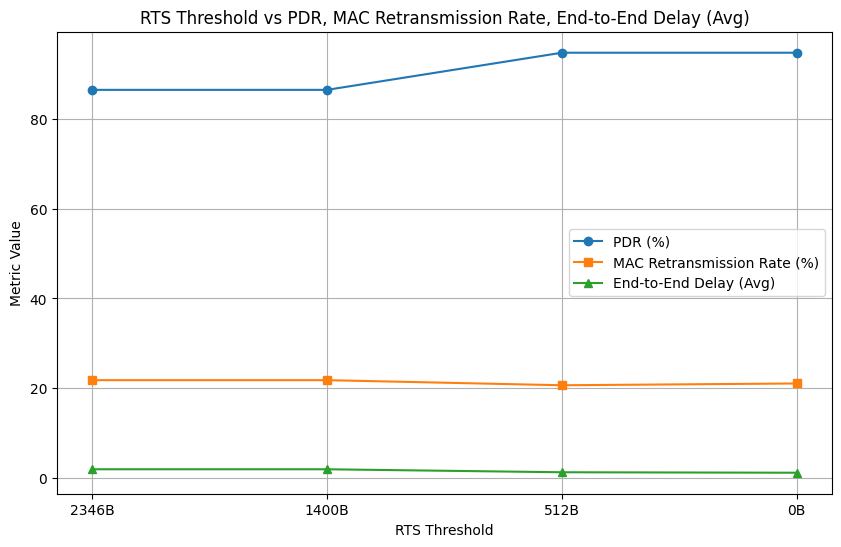

In [50]:
plt.figure(figsize=(10,6))
plt.plot(dcf_rts_df['RTS Threshold'], dcf_rts_df['PDR (%)'], marker='o', label='PDR (%)')
plt.plot(dcf_rts_df['RTS Threshold'], dcf_rts_df['MAC Retransmission Rate (%)'], marker='s', label='MAC Retransmission Rate (%)')
plt.plot(dcf_rts_df['RTS Threshold'], dcf_rts_df['End-to-End Delay (Avg)'], marker='^', label='End-to-End Delay (Avg)')
plt.xlabel('RTS Threshold')
plt.ylabel('Metric Value')
plt.title('RTS Threshold vs PDR, MAC Retransmission Rate, End-to-End Delay (Avg)')
plt.legend()
plt.grid()
plt.show()